In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('df_agg_cluster_0.xlsx', sheet_name='Sheet1')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeça  \
513    NaN  830.17               35.3                28.3                 9.3   
514    NaN  756.44               34.0                27.5                 9.7   
515    NaN  600.67               32.0                29.7                 8.5   
516    NaN  830.18               34.5                28.3                 9.5   
517    NaN  888.25               34.1                27.5                 9.1   
518    NaN  683.54               30.0                28.8                 8.0   
519    NaN  841.54               33.1                29.3                 9.1   
520    NaN  666.60               31.5                26.4                 8.9   
521    NaN  798.02               34.0                28.3                 9.3   
522    NaN  739.16               32.0                27.1                 9.0   

     altura  espessura  KMeans_Labels  Agglomerative_Labels  
513    10.3        3.4              0         

In [3]:
# Dropping the columns
df2 = df.drop(columns=[
'Index',
'espessura',
'Agglomerative_Labels',
'KMeans_Labels'
])
df2.head()

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura
0,86.35,15.5,13.6,42.0,4.7
1,198.79,20.2,17.3,6.0,6.5
2,242.37,22.4,17.8,6.0,7.0
3,171.31,19.0,16.5,6.0,6.4
4,171.27,20.0,17.2,5.6,6.2


In [4]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [5]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df2,  target = 'peso', train_size=0.8)
best_model = exp2.compare_models()

,Description,Value
0,Session id,6582
1,Target,peso
2,Target type,Regression
3,Original data shape,"(523, 5)"
4,Transformed data shape,"(523, 5)"
5,Transformed train set shape,"(366, 5)"
6,Transformed test set shape,"(157, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,29.4537,2015.1398,43.2800,0.9496,0.0934,0.0692,0.0580
rf,Random Forest Regressor,29.3780,2025.0348,43.2186,0.9491,0.0935,0.0684,0.0650
knn,K Neighbors Regressor,29.1523,2098.3537,43.9246,0.9469,0.0938,0.0680,0.0210
gbr,Gradient Boosting Regressor,29.6589,2157.3161,44.9896,0.9459,0.0927,0.0680,0.0310
et,Extra Trees Regressor,30.1898,2162.8548,44.6708,0.9450,0.0964,0.0697,0.0500
huber,Huber Regressor,32.2139,2250.1172,45.5678,0.9446,0.1131,0.0811,0.0150
lasso,Lasso Regression,32.4601,2272.5602,45.6494,0.9438,0.1197,0.0839,0.0100
llar,Lasso Least Angle Regression,32.4566,2272.6235,45.6534,0.9438,0.1196,0.0839,0.0080
lr,Linear Regression,32.5190,2274.2693,45.7176,0.9436,0.1200,0.0843,0.8000
ridge,Ridge Regression,32.5022,2273.3106,45.6909,0.9436,0.1198,0.0842,0.0110


In [6]:
rf = exp2.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30.1192,1824.4531,42.7136,0.9631,0.0800,0.0605
1,28.8469,1411.1086,37.5647,0.9484,0.0871,0.0678
2,17.0070,552.7965,23.5116,0.9837,0.0564,0.0449
3,33.3058,4221.3530,64.9719,0.8567,0.1501,0.0965
4,27.4367,1271.2472,35.6546,0.9585,0.0799,0.0639
5,24.2344,1329.3189,36.4598,0.9688,0.0961,0.0639
6,26.9046,1171.7998,34.2316,0.9730,0.0735,0.0617
7,32.5724,2339.3206,48.3665,0.9482,0.0981,0.0704
8,32.6089,2447.1879,49.4691,0.9550,0.0954,0.0688


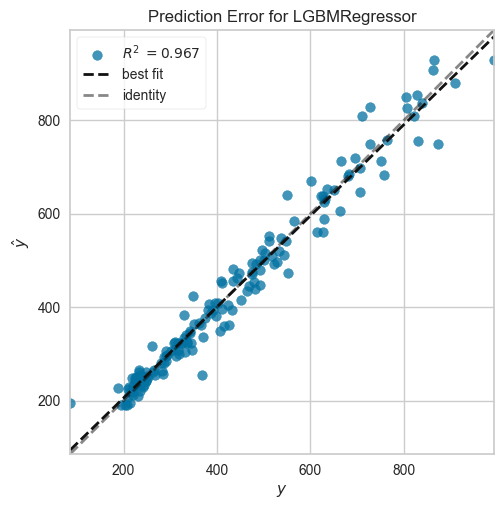

In [7]:
exp2.plot_model(rf, plot = 'error')

In [8]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,24.2823,1216.4122,34.8771,0.9672,0.0991,0.0632


,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
315,29.799999,23.400000,8.0,9.3,502.540009,515.756267
397,29.799999,25.799999,7.6,8.0,473.940002,476.241197
121,24.500000,20.500000,5.8,7.9,343.299988,349.527111
423,34.700001,28.600000,8.5,10.6,807.250000,825.497150
485,32.700001,26.900000,9.4,10.3,764.080017,756.821620
346,28.500000,24.400000,8.0,8.1,435.079987,455.958875
471,33.000000,27.400000,7.8,11.0,872.809998,749.560244
419,28.900000,24.299999,8.2,8.5,475.019989,470.961304
129,24.500000,20.200001,6.5,7.9,307.100006,323.112771
360,29.500000,24.299999,8.6,9.0,474.959991,493.637536


In [10]:
peso_pred_semEspe.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
8,21.799999,18.500000,6.0,7.0,224.970001,241.024952
449,32.599998,26.799999,8.9,10.2,750.280029,713.646033
382,31.200001,26.299999,8.9,9.0,627.729980,561.693458
114,23.500000,19.500000,5.4,8.0,347.589996,308.158737
299,28.500000,24.500000,7.5,8.9,522.140015,491.856621


# Continuidade do Modelo

In [11]:
### Saving model 

#save_model(rf, 'rf_weight') 


In [12]:
################### LOADING MODEL
saved_rf = load_model('rf_weight') 

saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeca', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=8604))])

In [13]:
exp2.predict_model(saved_rf)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- comprimento_Cabeça
Feature names seen at fit time, yet now missing:
- comprimento_Cabeca


In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)